# Determining Optimal Marketing Strategy

We are performing this analysis for an an e-learning company that offers courses on programming. Most of the courses are on web and mobile development, but they also cover many other domains, like data science, game development, etc. The company would like to promote their product and invest some money in advertisement. The goal in this project is to find out the two best markets in which to advertise.

## Exploratory Data Analysis

In [139]:
import pandas as pd
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
survey.shape

(18175, 136)

In [140]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

The data in this survey was collected by Free Code Camp, an online web development learning platform. The survey was initially published on their Medium page which has over 400,000 subscribers with interests across the specturm of programming specialties. Specifically directed toward new coders, this survey collects information about learners expectations, history, and goals which is ideal for our analysis. The dataset can is available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [141]:
# Identify most popular career interests
role_freq = survey['JobRoleInterest'].value_counts() / len(survey) * 100
role_freq

Full-Stack Web Developer                                                                                                                                                                                                                                                    4.528198
  Front-End Web Developer                                                                                                                                                                                                                                                   2.475928
  Data Scientist                                                                                                                                                                                                                                                            0.836314
Back-End Web Developer                                                                                                                                                   

This frequency table indicates that respondents were able to select more than 1 role of interest. Thus, the frequency table is extremely fragmented with many different combination possibilities.

Because we're interested in students seeking web and mobile development positions, we'll need to tally responses that include one of those two options. 

In [142]:
# Search for 'Web Developer' and 'Mobile Developer' in answers
import numpy as np
def web_mobile(value):
    if 'Web Developer' in value:
        return True
    if 'Mobile Developer' in value:
        return True
    else:
        return False
survey['web_mobile_interest'] = survey['JobRoleInterest'].replace(np.nan, '', regex=True)
survey['web_mobile_interest'] = survey['web_mobile_interest'].apply(web_mobile)

In [143]:
web_mobile_freq = survey['web_mobile_interest'].value_counts(dropna=False)
web_mobile_freq

False    12145
True      6030
Name: web_mobile_interest, dtype: int64

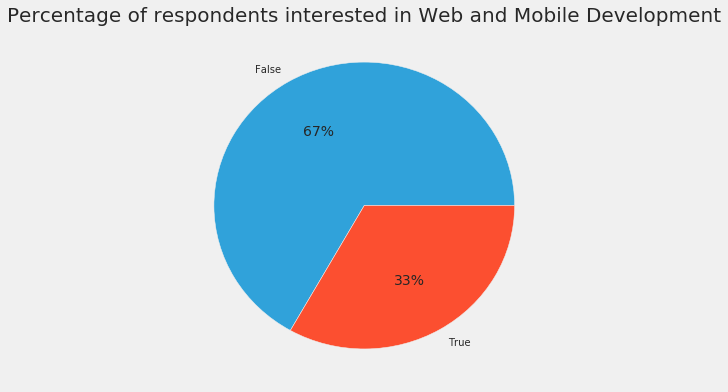

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

web_mobile_freq.plot.pie(figsize=(6, 6), autopct='%1.0f%%')
plt.title('Percentage of respondents interested in Web and Mobile Development', fontsize=20)
plt.ylabel('')


The results of this analysis show that a full one-third of respondents are interested in learning web or mobile development. This represents the largest section of interest among respondents (6000+ students).

Determining the locations of these students and their prosepctive budgets will aid in forming a marketing strategy.

In [145]:
survey_interested = survey[survey['JobRoleInterest'].notnull()]
country_freq_abs = survey_interested['CountryLive'].value_counts(dropna=False)
country_freq_abs

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
NaN                               154
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand 

In [146]:
country_freq_pct = country_freq_abs / len(survey_interested) * 100
country_freq_pct[:10]

United States of America    44.693936
India                        7.551487
United Kingdom               4.505149
Canada                       3.718535
NaN                          2.202517
Poland                       1.873570
Brazil                       1.844966
Germany                      1.787757
Australia                    1.601831
Russia                       1.458810
Name: CountryLive, dtype: float64

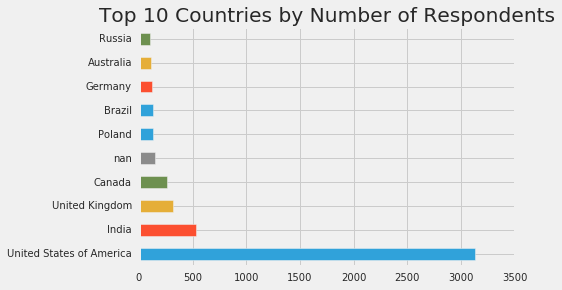

In [147]:
country_freq_abs[:10].plot.barh()
plt.title('Top 10 Countries by Number of Respondents')

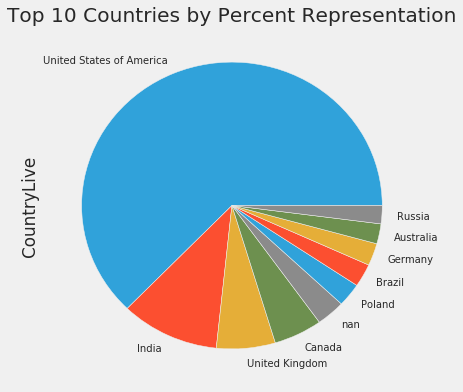

In [148]:
country_freq_pct[:10].plot.pie(figsize=(6,6), title='Top 10 Countries by Percent Representation')

The overwhelming majority of respondents hail from the United States, with a minor percentage from India and the United Kingdom following. Half of the countries in the 10 ten comprise less than 2 percent of respondents.

We recommend further research into marketing efforts for
-  USA
-  India
-  United Kingdom
-  Canada

These four countries have the greatest absolute number of interested students and they additionaly all speak English as an official language. As our materials are only offered in English, these four countries show the most promise.

To determine profitable markets, we will analyze respondents intended budget for programming courses from each of these four countries.

In [149]:
marketing_countries = survey_interested[
    (survey['CountryLive'] == 'United States of America') | 
    (survey['CountryLive'] == 'India') | 
    (survey['CountryLive'] == "United Kingdom") | 
    (survey['CountryLive'] == 'Canada')
]
print(len(marketing_countries))
print(type(marketing_countries))

4228
<class 'pandas.core.frame.DataFrame'>


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [150]:
marketing_countries['MoneyForLearning'].value_counts(dropna=False)

 0.0         1898
 100.0        253
NaN           221
 200.0        210
 500.0        150
 50.0         141
 1000.0       111
 300.0         91
 20.0          78
 400.0         65
 150.0         60
 2000.0        55
 30.0          53
 5000.0        50
 60.0          40
 40.0          37
 1500.0        33
 250.0         31
 600.0         30
 10.0          30
 15.0          30
 3000.0        26
 10000.0       25
 4000.0        21
 25.0          21
 8000.0        18
 20000.0       17
 800.0         16
 15000.0       16
 2500.0        16
 1200.0        16
 700.0         15
 80.0          13
 5.0           12
 70.0          12
 7000.0        11
 120.0         11
 11000.0       10
 12000.0       10
 35.0          10
 9000.0        10
 350.0         10
 14000.0        9
 6000.0         8
 90.0           8
 16000.0        8
 900.0          8
 450.0          7
 45.0           6
 1400.0         6
 13000.0        6
 18000.0        5
 3500.0         5
 25000.0        4
 125.0          4
 8500.0   

In [151]:
marketing_countries['MonthsProgramming'].value_counts(dropna=False)

 1.0      480
 2.0      401
 6.0      397
 12.0     386
 3.0      380
 24.0     267
 4.0      209
NaN       179
 36.0     162
 5.0      156
 0.0      150
 8.0      132
 18.0      92
 10.0      83
 7.0       72
 48.0      71
 9.0       70
 20.0      53
 14.0      49
 60.0      47
 15.0      45
 30.0      44
 16.0      36
 11.0      25
 13.0      22
 40.0      22
 72.0      19
 17.0      16
 50.0      15
 28.0       9
 120.0      8
 42.0       8
 26.0       8
 32.0       7
 25.0       7
 19.0       5
 45.0       5
 21.0       5
 200.0      4
 144.0      4
 52.0       4
 29.0       4
 100.0      4
 27.0       4
 84.0       4
 96.0       3
 55.0       3
 44.0       3
 54.0       3
 35.0       3
 744.0      3
 360.0      3
 22.0       2
 59.0       2
 240.0      2
 480.0      2
 38.0       2
 70.0       2
 33.0       2
 108.0      2
 190.0      1
 80.0       1
 113.0      1
 180.0      1
 43.0       1
 198.0      1
 111.0      1
 58.0       1
 23.0       1
 31.0       1
 34.0       1
 156.0

Some students indicated that they've been programming for 0 months. To avoid dividing by 0, we will assume these students have been programming for 1 month (or in other words, they are in their first month of programming)

All rows with NaN values for spend or months learning will be removed as they do not add any value to our analysis. 

In [152]:
# Replace 0 with 1 in MonthsProgramming
marketing_countries['MonthsProgramming'] = marketing_countries.loc[:, 'MonthsProgramming'].replace(0, 1)

# Retain non-null rows
marketing_countries = marketing_countries[
    marketing_countries['MoneyForLearning'].notnull() &
    marketing_countries['MonthsProgramming'].notnull()
]
len(marketing_countries)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


3915

In [153]:
marketing_countries['MonthlySpend'] = marketing_countries['MoneyForLearning'] / marketing_countries['MonthsProgramming']

In [154]:
marketing_countries['MonthlySpend'].head()

1      13.333333
2     200.000000
6       0.000000
15      0.000000
16     16.666667
Name: MonthlySpend, dtype: float64

In [155]:
country_groups = marketing_countries.groupby('CountryLive')
country_avg_spend = country_groups['MonthlySpend'].mean().sort_values(ascending=True)
country_avg_spend

CountryLive
United Kingdom               45.534443
Canada                      113.510961
India                       135.100982
United States of America    227.997996
Name: MonthlySpend, dtype: float64

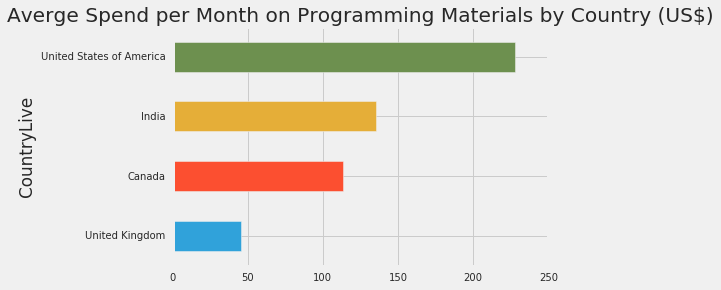

In [156]:
country_avg_spend.plot.barh(title='Averge Spend per Month on Programming Materials by Country (US$)')

An oddity in the data is the relatively high spend of students in India, where economic data show a much lower level of wealth than countries like Canada and the United Kingdom. However, this may be a result of the sheer size of the Indian Population. While the average wealth may be lower than the other three countries in our analysis, there may still be a large population of wealthy Indians who spend money learning to program.

We will explore any outliers individually and determine whether or not to remove them from the analysis.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


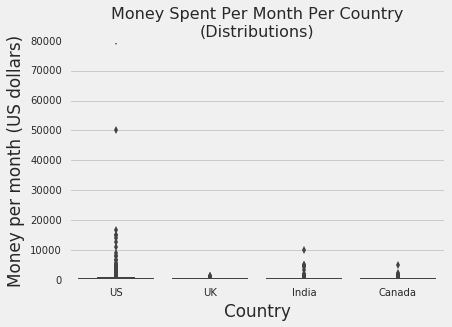

In [162]:
# Isolate only the countries of interest
only_4 = marketing_countries[marketing_countries['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'MonthlySpend', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can see from the preceeding graphs that the data contain serious outliters. We'll examine some of these responses to determine validity and removal.

In [163]:
only_4_outliers = only_4[only_4['MonthlySpend'] > 4000]

In [164]:
len(only_4_outliers)

30

In [165]:
only_4_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,web_mobile_interest,MonthlySpend
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Na

In [166]:
only_4_outliers['AttendedBootcamp'].value_counts(dropna=False)

0.0    16
1.0    14
Name: AttendedBootcamp, dtype: int64

Of the 30 students who've spend more than $4,000/month on programming, nearly half of them attended/are attending a bootcamp. The figures for those 14 are, thus, understandable.

In [167]:
only_4_outliers['MonthsProgramming'].value_counts(dropna=False)

1.0     9
2.0     8
3.0     7
10.0    1
12.0    1
24.0    1
5.0     1
6.0     1
4.0     1
Name: MonthsProgramming, dtype: int64

In [169]:
pd.pivot_table(only_4_outliers, values=['MonthsProgramming', 'MonthlySpend'], index=['AttendedBootcamp'], aggfunc=np.mean)

,MonthlySpend,MonthsProgramming
AttendedBootcamp,,
0.0,12591.666667,4.812500
1.0,9916.666667,2.142857


The average bootcamp attendee has been programming for only 2.1 months, and with high tuition fees, the monthly spend will naturally be high.

The 16 students who didn't attend bootcamps, though, have more than double the average experience, but are spending upwards of $12,500/month. These will need to be investigated further.

In [170]:
only_4_no_bc = only_4_outliers[only_4_outliers['AttendedBootcamp'] == 0.0]

In [175]:
only_4_no_bc[['MonthlySpend', 'MonthsProgramming', 'MoneyForLearning']]

,MonthlySpend,MonthsProgramming,MoneyForLearning
1728,5000.000000,4.0,20000.0
2480,4250.000000,2.0,8500.0
3930,10833.333333,6.0,65000.0
5769,5000.000000,3.0,15000.0
6528,5000.000000,1.0,5000.0
7198,14000.000000,5.0,70000.0
7989,5000.000000,1.0,5000.0
8126,5000.000000,1.0,5000.0
13398,10000.000000,2.0,20000.0
14024,80000.000000,1.0,80000.0


In [176]:
only_4_no_bc['CountryLive'].value_counts()

United States of America    11
India                        5
Name: CountryLive, dtype: int64

These 16 students all come from the USA or India and many of them have spent large sums on programming education. Two students have spent six-figures and one has spent $80,000 for one month of courses. These may or may not be errors, but they are not representative of our target markets, so we will exclude them from the analysis.

In [201]:
only_4_reg = only_4[(only_4['MonthlySpend'] < 5000) | only_4['AttendedBootcamp'] == 1.0]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


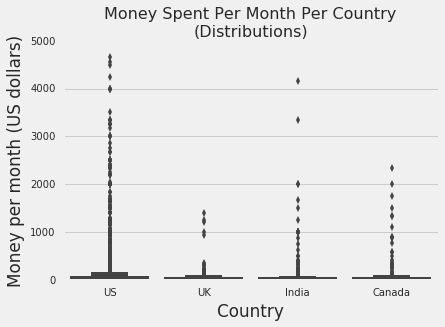

In [202]:
import seaborn as sns
sns.boxplot(y = 'MonthlySpend', x = 'CountryLive',
            data = only_4_reg)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We've now removed anyone whose monthly spend is greater than $5,000 and did not attend a bootcamp.

Two more points of interest are the top outliers in India. We will examine these rows more closely to determine eligibility.

In [203]:
india_two = only_4_reg[(only_4_reg['CountryLive'] == 'India') & (only_4_reg['MonthlySpend'] > 3000)]
india_two

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,web_mobile_interest,MonthlySpend
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,True,3333.333333
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,India,India,software development and IT,NaN,Employed for wages,NaN,65000.0,0.0,NaN,male,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,36.0,5a7394f24292cb82b72adb702886543a,8bc7997217d4a57b22242471cc8d89ef,60000.0,0.0,0.0,0.0,1.0,I haven't decided,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a startup,NaN,"Full-Stack Web Developer, Data Scientist",from home,Hindi,"single, never married",100000.0,24.0,8af0c2b6da,2017-04-03 09:43:53,2017-04-03 09:39:38,2017-04-03 09:54:39,2017-04-03 09:43:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Communications,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1

Neither of these respondents attended a bootcamp, althought they both have been learning for 15 months or more. It is difficult to tell whether these responses are acurate or whether they are including information such as college tuition in their caluclations. As they are both much higher than even any other outliers in the India data, we will remove them.

In [204]:
print(len(only_4_reg))
only_4_reg = only_4_reg.drop(india_two.index, axis=0)
print(len(only_4_reg))

3890
3888


In [205]:
country_groups = only_4_reg.groupby('CountryLive')
country_groups['MonthlySpend'].mean().sort_values(ascending=False)

CountryLive
United States of America    130.639017
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: MonthlySpend, dtype: float64

These new average monthly spends reflect the removal of any suspect data points and extreme outliers. 

In [209]:
country_groups['CountryLive'].value_counts().sort_values(ascending=False)

CountryLive               CountryLive             
United States of America  United States of America    2913
India                     India                        457
United Kingdom            United Kingdom               279
Canada                    Canada                       239
Name: CountryLive, dtype: int64

Based on the results of this analysis we certainly recommend deploying the majority of marketing efforts toward potential students in the United States.

Between the remaining three India appears to be the most promising market for additionl spend. While Canadian students appear to be more willing to spend more money monthly on resources, the market size in India is much larger. The opportunity to acquire more students, although at a discount, makes India a promising target. 

The Marketing department will be able to provide further insight into the desired secondm